### PS basic Skeletonisation
This section of code shows how it is possible to run a skeleton filter, that runs similar to the HWA version we created, in OpenCV without any HWA. It also provides a timer to show the time it takes to operate.

In [3]:
import numpy as np
import cv2
import os
import time
from PIL import Image

#timer 
start_time = time.time()
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# Load img and resize to look nice
img_og = cv2.imread(os.path.join(parent_dir, 'Peppers.jpg')) # CHANGE THIS
img = cv2.resize(img_og, (1920, 1080)) # To make sure

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Info
size = np.size(gray_img)
skel = np.zeros(gray_img.shape, np.uint8)

ret, gray_img = cv2.threshold(gray_img, 127, 255, 0) # change all values 127 ~ 255 to 0
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
iterations = 0

while(iterations < 1): # fun number
    eroded =  cv2.erode(gray_img, element)
    temp = cv2.dilate(eroded, element)
    temp = cv2.subtract(gray_img, temp)
    skel = cv2.bitwise_or(skel, temp)
    gray_img = eroded.copy()

    zeros = size - cv2.countNonZero(gray_img)
    if zeros == size:
        iterations =3
        
    iterations =+ 1

cv2.imwrite('Peppers_single_skelly.jpg', skel)
print("Time taken: %s seconds " % (time.time() - start_time))

Time taken: 0.8793284893035889 seconds 


The process of this code is:
* Find and specify path of image
* Resize for convenience sake so that it is easier to view
* Convert the image to a greyscale
* Derive the necerssary information from the greyscale then transform it into binary
    - If it is below the threshold of 127, it will transform to a 0
    - Otherwise, it will become 255 (the max value)
        - The reason for changing it to max instead of a binary 1 is for visualisation reasons, otherwise it would be too dark to see
* While loop contains the skeletonisation filter
    - Only does it once
* Output final image out in seperate file
* Timer to visualise how long it takes on a pure PS implementation

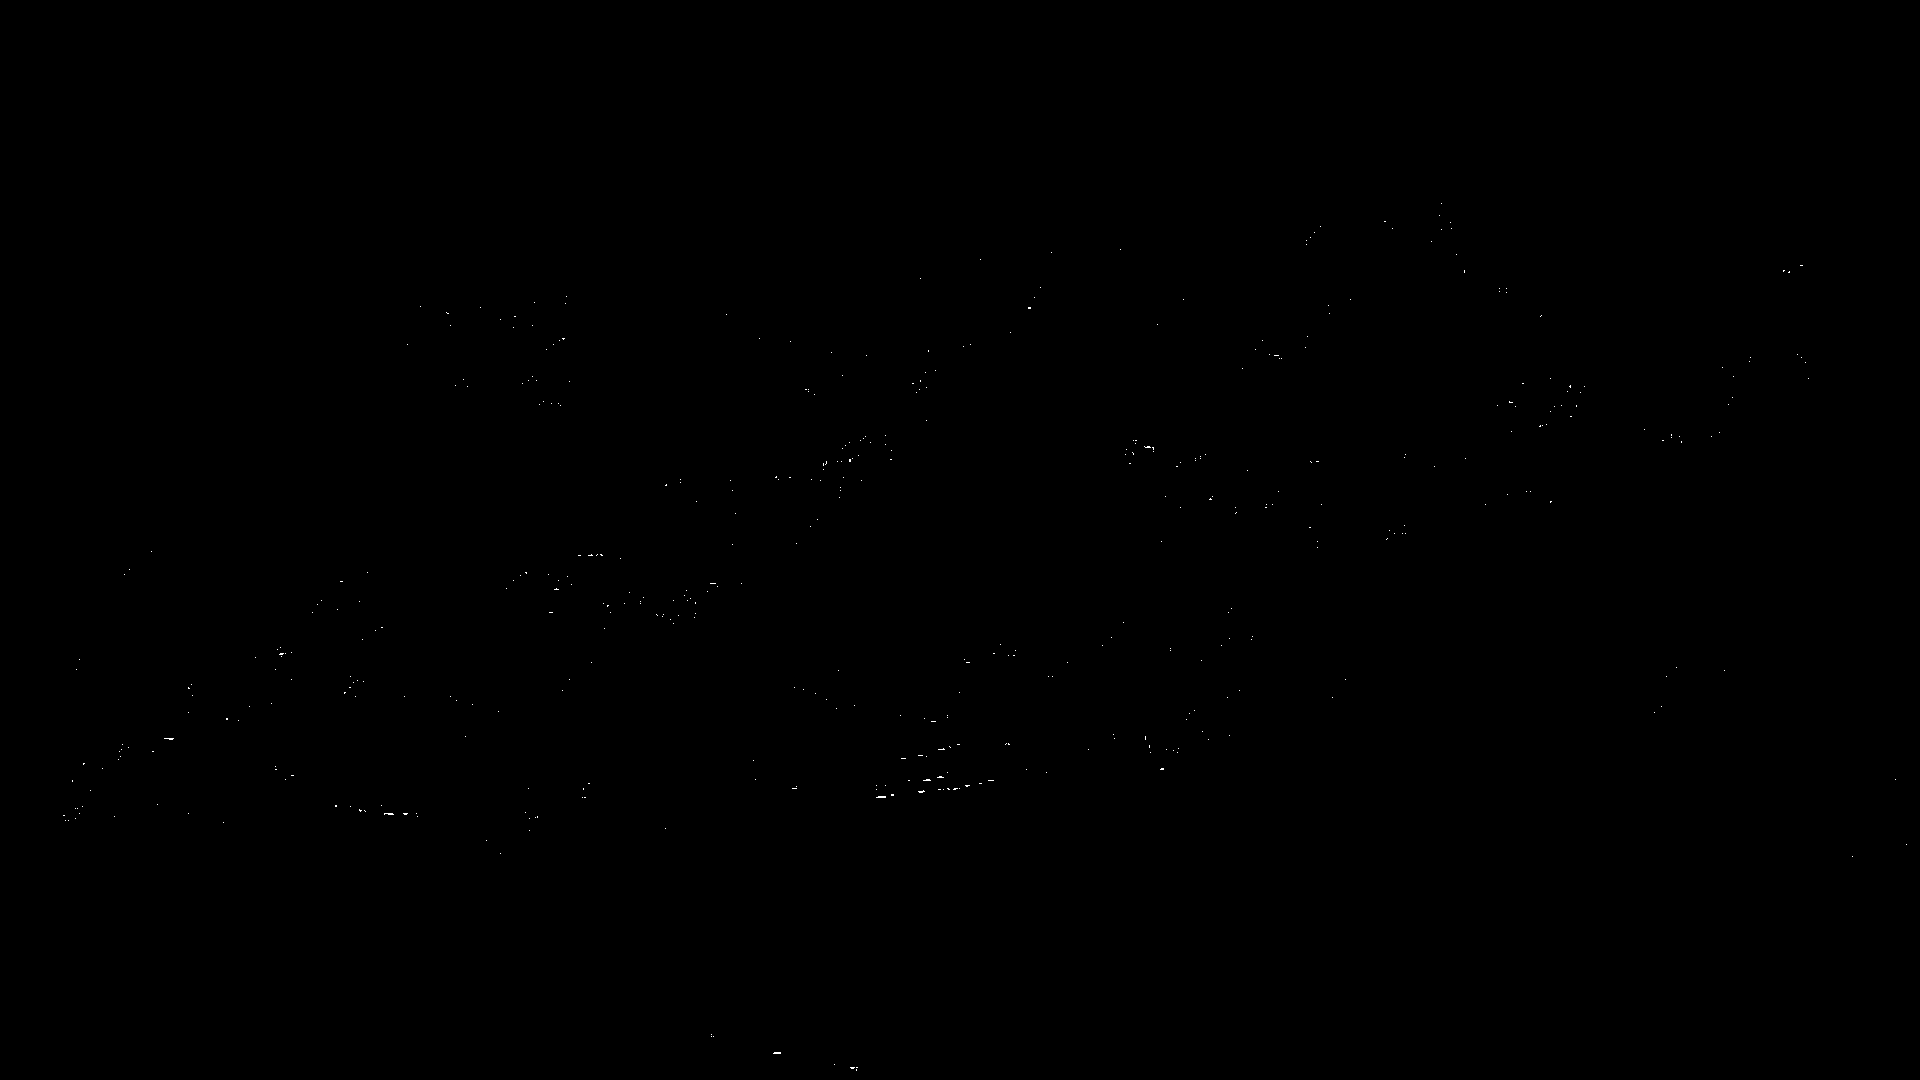

In [4]:
Image.fromarray(np.uint8(skel), mode='P')